In [ ]:
# install libraries
packages <- c("TSA", "astsa", "zoo", "xts", "quantmod", "fBasics",
              "forecast", "ggplot2", "fGarch", "rugarch", "tseries", "gridExtra")

install.packages(packages)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘gbutils’, ‘Rdpack’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘leaps’, ‘locfit’, ‘TTR’, ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘urca’, ‘RcppArmadillo’, ‘fastICA’, ‘cvar’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘nloptr’, ‘quadprog’




In [ ]:
# Load libraries
lapply(packages, library, character.only = TRUE)



Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘fBasics’


The following object is masked from ‘package:TTR’:

    volatility


The following object is masked from ‘package:astsa’:

    nyse


The following objects are masked from ‘package:TSA’:

    kurtosis, skewness


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas


NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed at

[[1]]
[1] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "astsa"     "TSA"       "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "zoo"       "astsa"     "TSA"       "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "xts"       "zoo"       "astsa"     "TSA"       "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "quantmod"  "TTR"       "xts"       "zoo"       "astsa"     "TSA"      
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[6]]
 [1] "fBasics"   "quantmod"  "TTR"       "xts"       "zoo"       "astsa"    
 [7] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[7]]
 [1] "forecast"  "fBasics"   "quantmod"  "TTR"       "xts"       "zoo"      
 [7] "astsa"     "TSA"       "stats"     "graphics"  "grDevices" "utils"    
[13] "datasets"  "methods"   "base"     

[[8]]
 [1] "ggplot2"   "forecast"  "fBasics"   "quantmod"  "TTR"       "xts"      
 [7] "zoo"       "astsa"     "TSA"       "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[9]]
 [1] "fGarch"    "ggplot2"   "forecast"  "fBasics"   "quantmod"  "TTR"      
 [7] "xts"       "zoo"       "astsa"     "TSA"       "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[10]]
 [1] "rugarch"   "parallel"  "fGarch"    "ggplot2"   "forecast"  "fBasics"  
 [7] "quantmod"  "TTR"       "xts"       "zoo"       "astsa"     "TSA"      
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[11]]
 [1] "tseries"   "rugarch"   "parallel"  "fGarch"    "ggplot2"   "forecast" 
 [7] "fBasics"   "quantmod"  "TTR"       "xts"       "zoo"       "astsa"    
[13] "TSA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[19] "methods"   "base"     

[[12]]
 [1] "gridExtra" "tseries"   "rugarch"   "parallel"  "fGarch"    "ggplot2"  
 [7] "forecast"  "fBasics"   "quantmod"  "TTR"       "xts"       "zoo"      
[13] "astsa"     "TSA"       "stats"     "graphics"  "grDevices" "utils"    
[19] "datasets"  "methods"   "base"

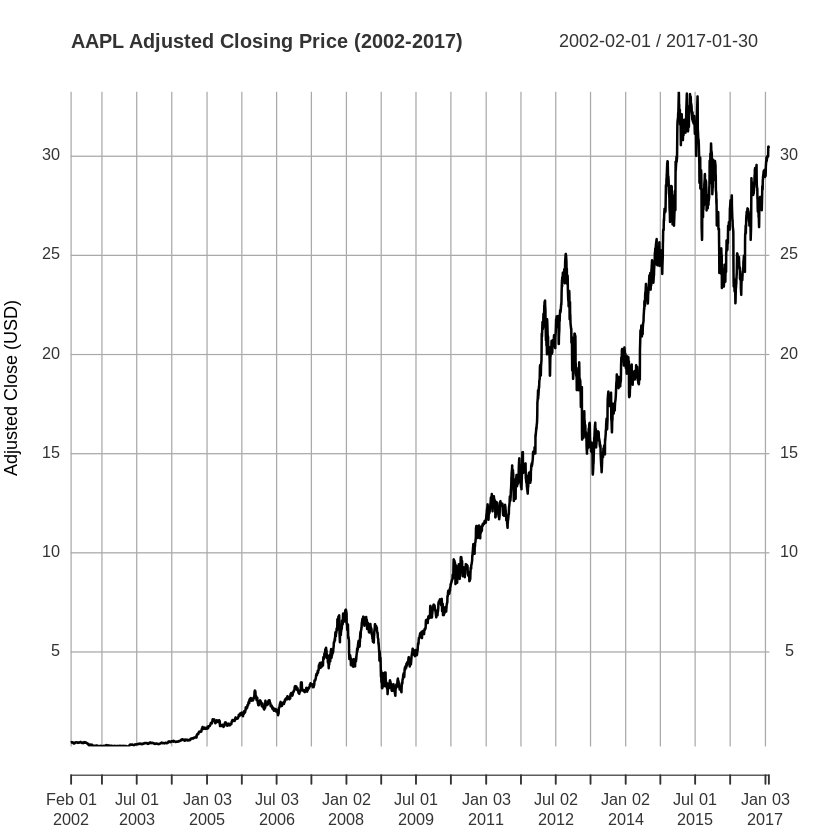

In [ ]:
# Set date range and symbol
from <- '2002-02-01'
to <- '2017-01-31'
apple <- 'AAPL'

# Download data
apple_data <- getSymbols(apple, from = from, to = to, src = 'yahoo', auto.assign = FALSE)

# Remove NA values if any
apple_data <- na.omit(apple_data)

# Extract Adjusted Close prices
adj_close <- Cl(apple_data)

# Plotting the data
plot(adj_close,
     main = "AAPL Adjusted Closing Price (2002-2017)",
     xlab = 'Date',
     ylab = 'Adjusted Close (USD)')


In [ ]:
# Total observations
total_observations <- nrow(apple_data)

# Print the total number of observations
print(total_observations)


[1] 3775


     Index              AAPL.Close     
 Min.   :2002-02-01   Min.   : 0.2343  
 1st Qu.:2005-10-29   1st Qu.: 1.9632  
 Median :2009-07-31   Median : 6.6204  
 Mean   :2009-07-31   Mean   :10.7746  
 3rd Qu.:2013-05-01   3rd Qu.:19.1407  
 Max.   :2017-01-30   Max.   :33.2500  

An xts object on 2002-02-01 / 2017-01-30 containing: 
  Data:    double [3775, 1]
  Columns: AAPL.Close
  Index:   Date [3775] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-04-28 11:37:30"


           AAPL.Close
2002-02-01   0.435893
2002-02-04   0.452679
2002-02-05   0.454464
2002-02-06   0.440536
2002-02-07   0.433929
2002-02-08   0.429107

           AAPL.Close
2017-01-23    30.0200
2017-01-24    29.9925
2017-01-25    30.4700
2017-01-26    30.4850
2017-01-27    30.4875
2017-01-30    30.4075

[1] 10.77465

[1] 6.620357

,AAPL.Close
AAPL.Close,101.7159


[1] 10.08543

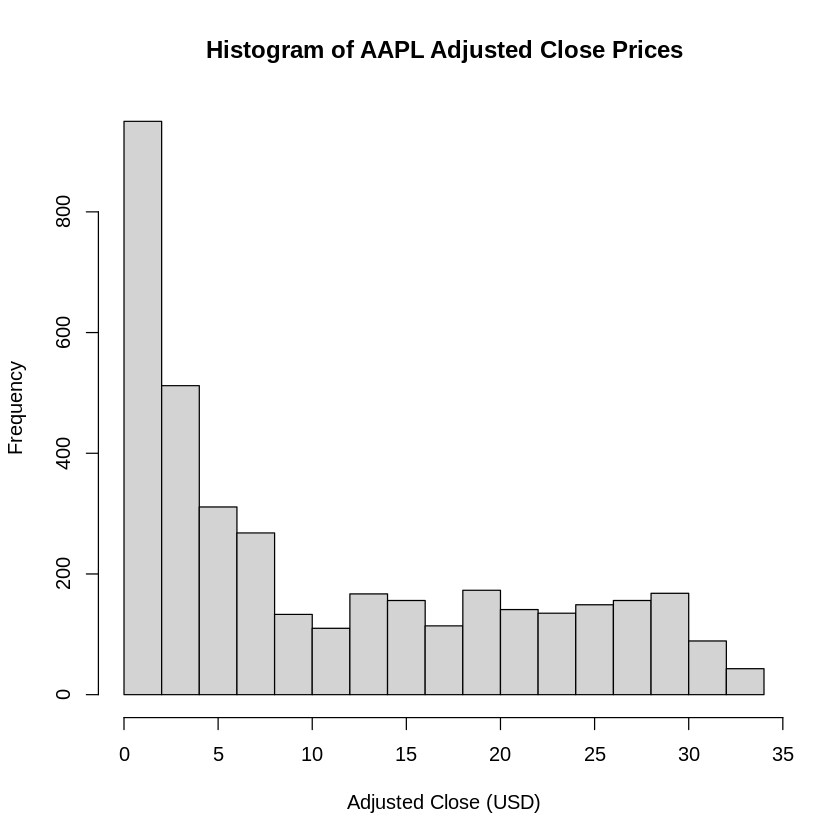

In [ ]:

# Basic summary statistics
summary(adj_close)

# Structure of the data
str(adj_close)

# First few rows of the data
head(adj_close)

# Last few rows of the data
tail(adj_close)

# Statistical properties like mean, median, variance, etc.
mean(adj_close)
median(adj_close)
var(adj_close)
sd(adj_close)  # Standard deviation

# Plot a histogram to see the distribution
hist(adj_close, main="Histogram of AAPL Adjusted Close Prices", xlab="Adjusted Close (USD)")


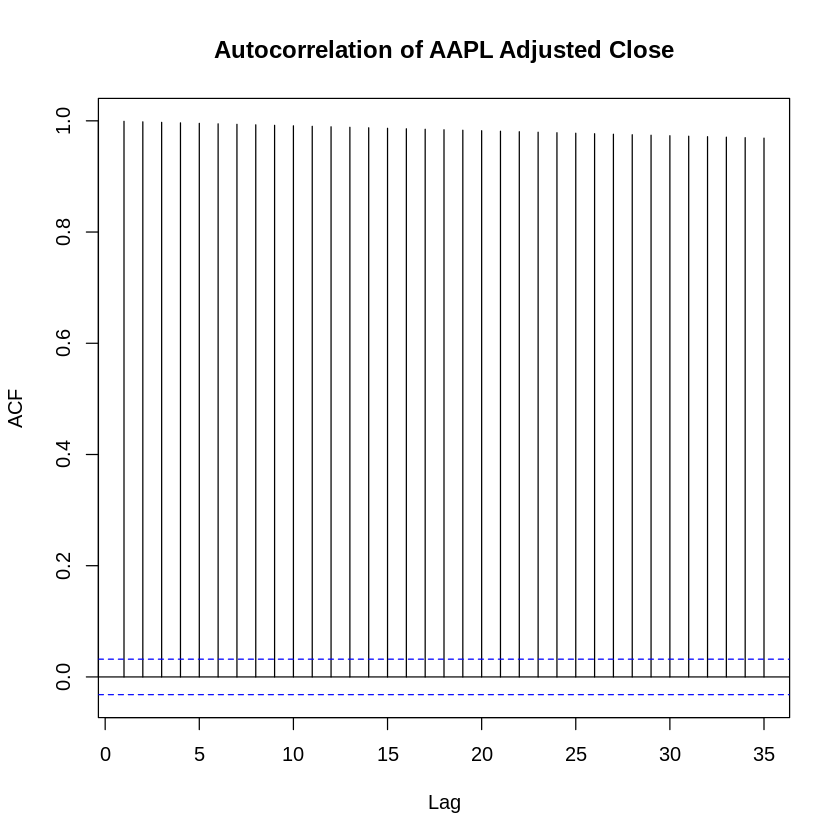

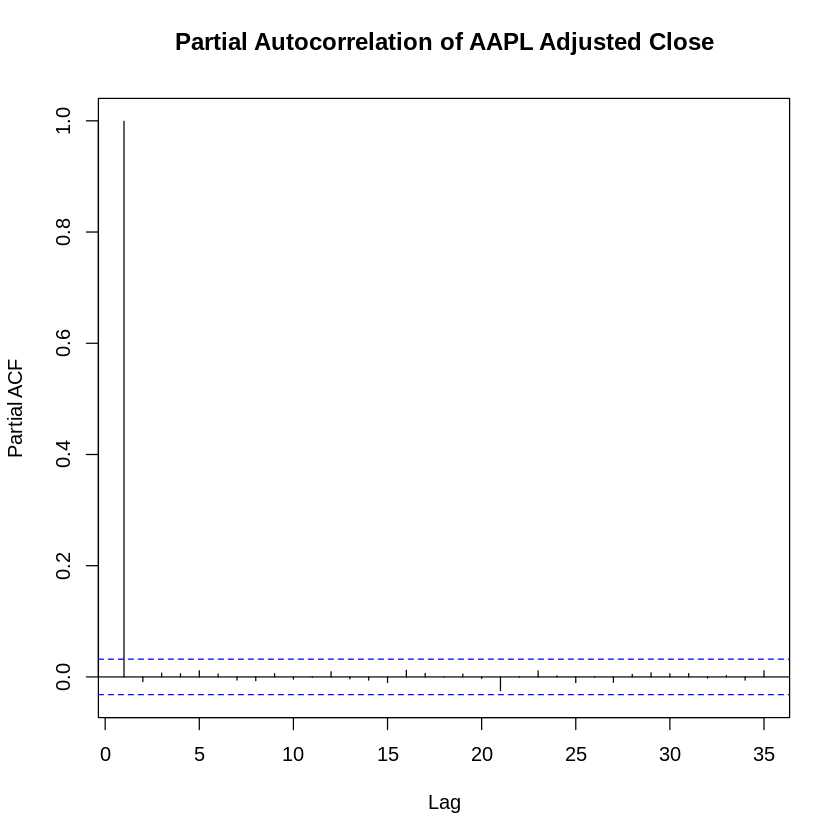

In [ ]:
# Plot ACF and PACF
# Autocorrelation Function
acf(adj_close, main="Autocorrelation of AAPL Adjusted Close")

# Partial Autocorrelation Function
pacf(adj_close, main="Partial Autocorrelation of AAPL Adjusted Close")


In [ ]:
# Run the Augmented Dickey-Fuller Test
adf_result <- adf.test(adj_close, alternative = "stationary")

# Print the results
print(adf_result)



	Augmented Dickey-Fuller Test

data:  adj_close
Dickey-Fuller = -2.3884, Lag order = 15, p-value = 0.4139
alternative hypothesis: stationary



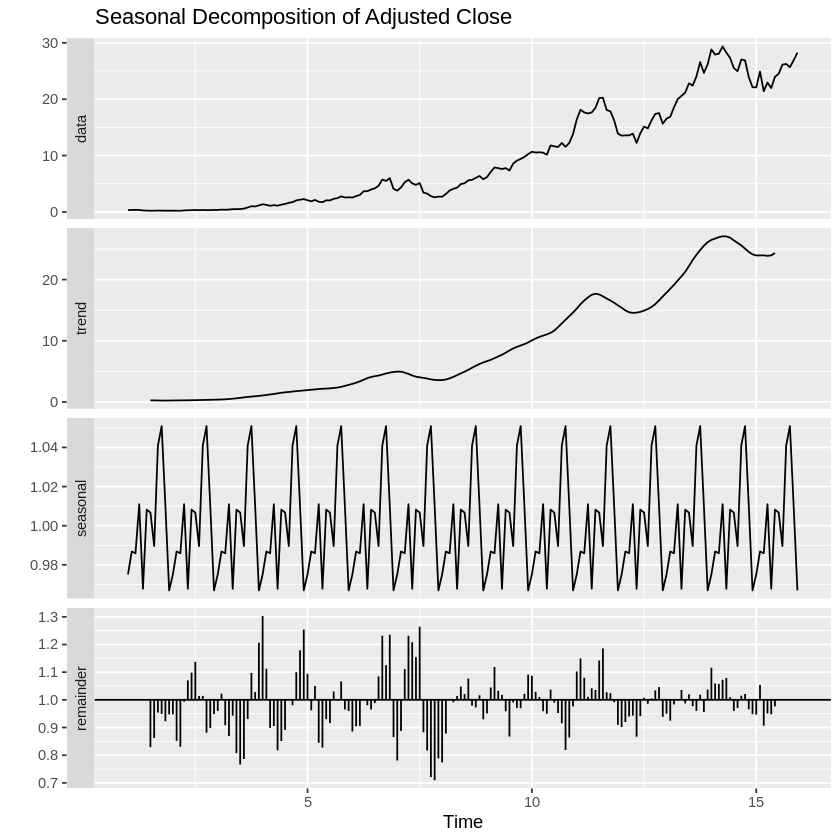

In [ ]:
# Decomposition of Time Series

# First, ensure it's at the right frequency, if it's daily data, aggregate it to monthly
monthly_adj_close <- to.monthly(apple_data$AAPL.Adjusted, OHLC = FALSE)

# Convert the monthly data to a time series object
adj_close_ts <- ts(monthly_adj_close, frequency = 12)

# Perform Classical Decomposition
decomp <- decompose(adj_close_ts, type = "multiplicative")

# Plot the decomposed components using autoplot for a ggplot2 object
autoplot(decomp, main = "Seasonal Decomposition of Adjusted Close")

In [ ]:
# Returns and transformation

# Calculate log returns
log_returns <- diff(log(adj_close))

# Calculate simple returns
simple_returns <- diff(adj_close) / lag(adj_close, -1)
simple_returns <- simple_returns[!is.na(simple_returns)] # Remove NA values from simple returns

# Apply Box-Cox Transformation with lambda chosen automatically
bc_transform <- BoxCox(adj_close, lambda = BoxCox.lambda(adj_close))

# Applying transformation logic with lambda set to 0 (log transformation)
transformation_lambda = 0
data_transformed <- diff(BoxCox(adj_close, transformation_lambda))
data_transformed <- data_transformed[!is.na(data_transformed)] # Remove NA values

data_transformed

              AAPL.Close
2002-02-04  3.778648e-02
2002-02-05  3.935394e-03
2002-02-06 -3.112653e-02
2002-02-07 -1.511123e-02
2002-02-08 -1.117459e-02
2002-02-11  3.877180e-02
2002-02-12 -1.086653e-02
2002-02-13  1.206740e-02
2002-02-14 -1.652833e-02
2002-02-15 -2.886794e-02
       ...              
2017-01-17  8.032164e-03
2017-01-18 -8.335461e-05
2017-01-19 -1.751672e-03
2017-01-20  1.835026e-03
2017-01-23  6.664598e-04
2017-01-24 -9.164809e-04
2017-01-25  1.579521e-02
2017-01-26  4.922089e-04
2017-01-27  8.195914e-05
2017-01-30 -2.627473e-03

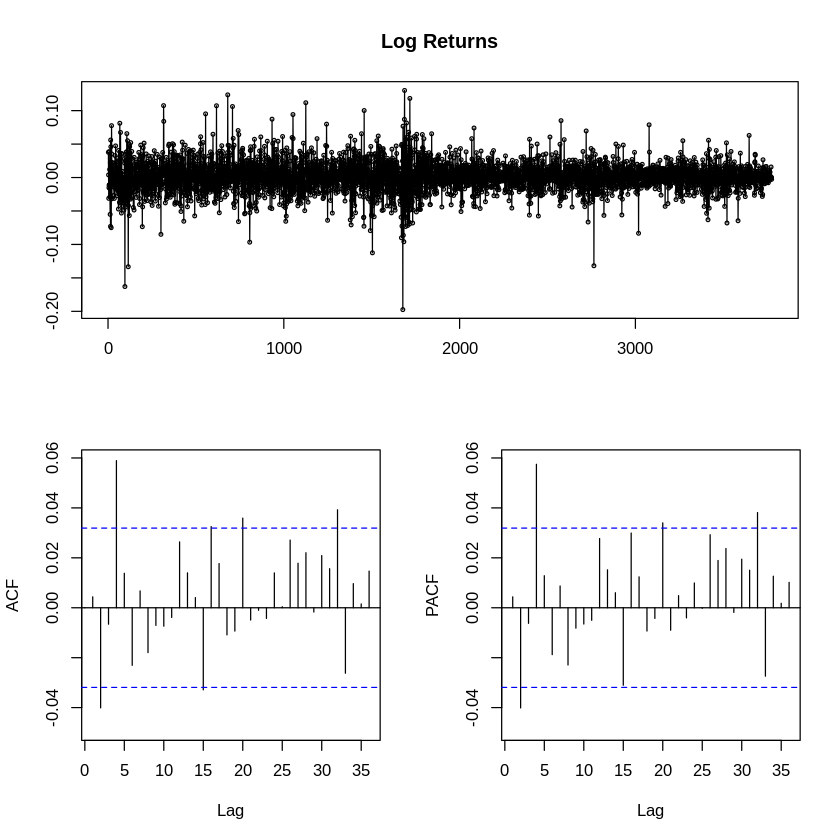

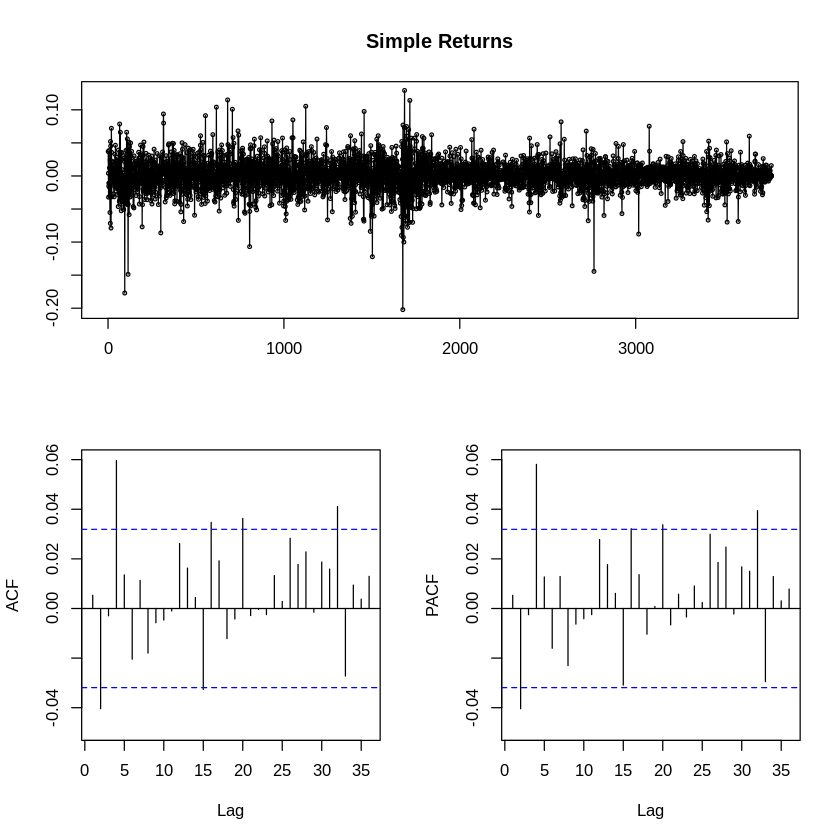

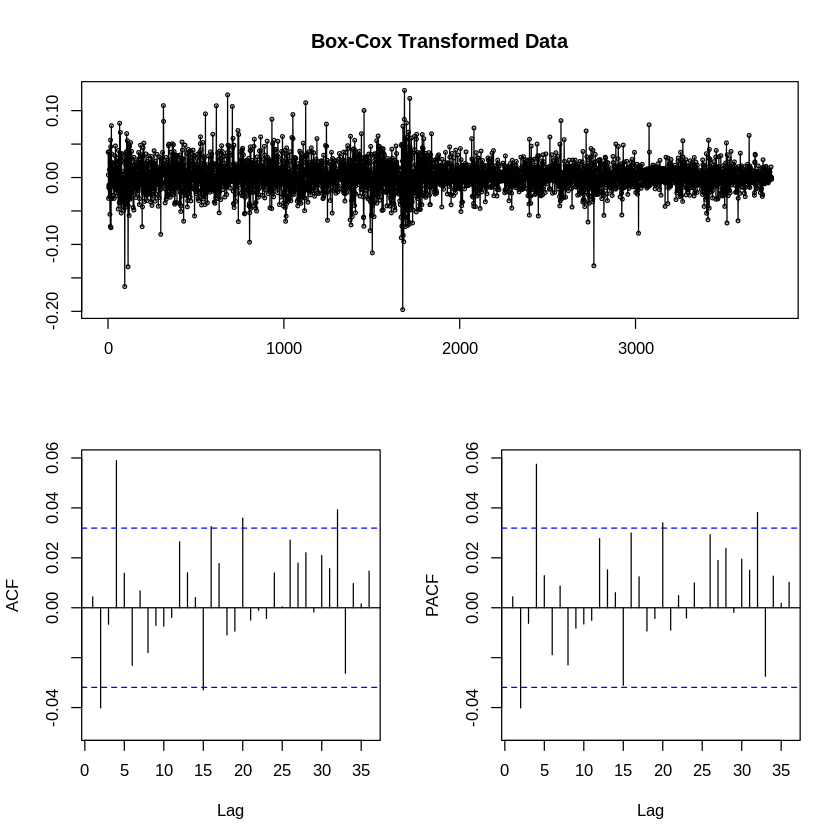

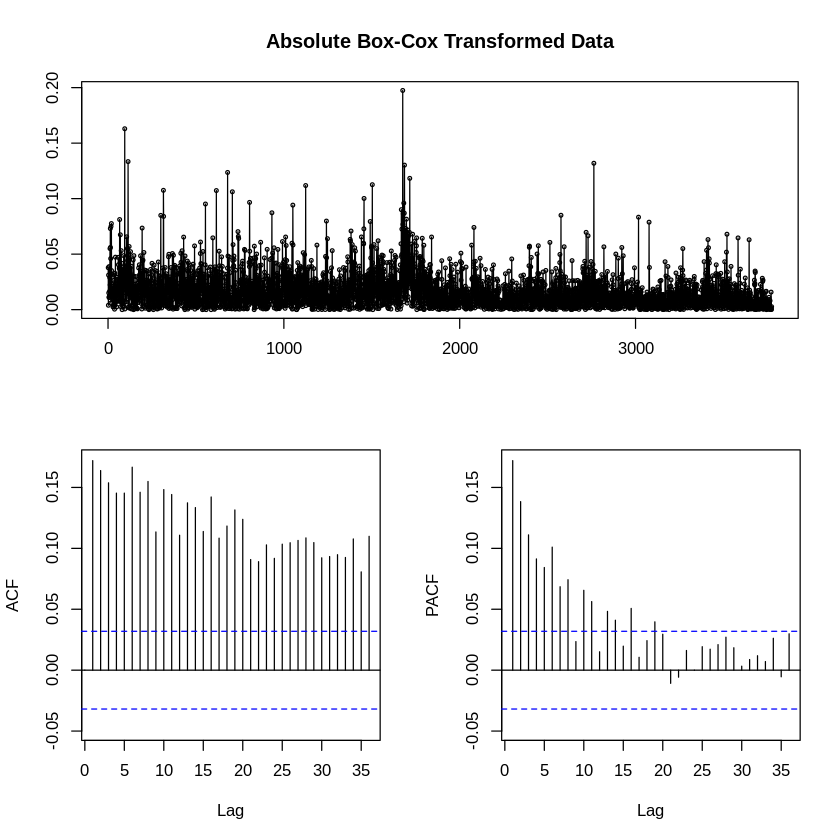

Warning message in adf.test(data_transformed, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data_transformed
Dickey-Fuller = -14.928, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary



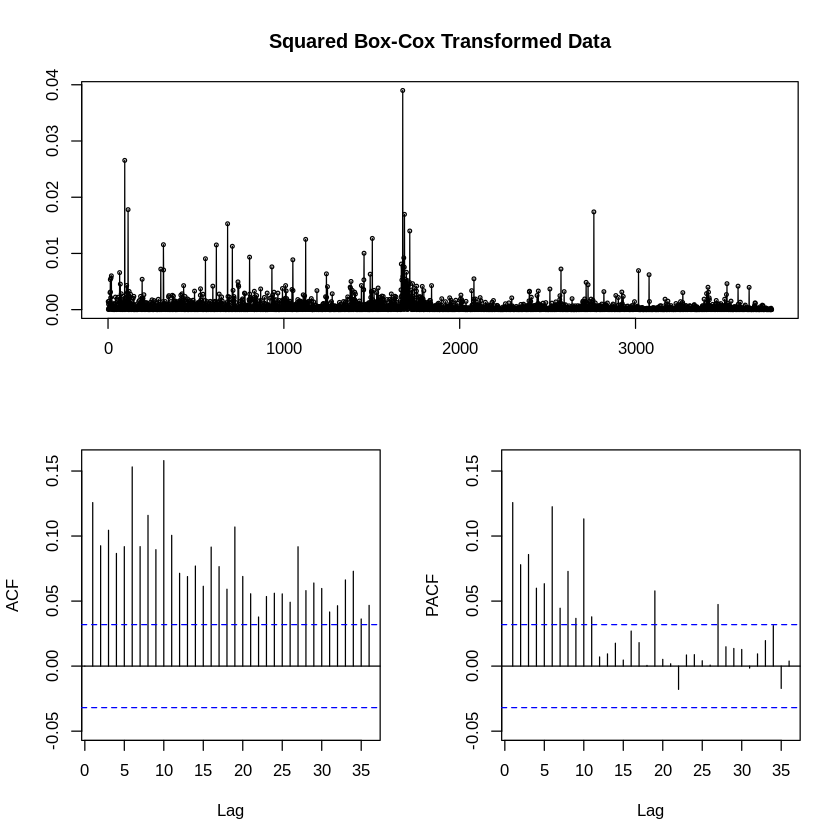

In [ ]:

# Now plot the time series and their ACF and PACF
# For log returns
tsdisplay(log_returns, main='Log Returns')

# For simple returns
tsdisplay(simple_returns, main='Simple Returns')

# For Box-Cox transformed data
tsdisplay(data_transformed, main='Box-Cox Transformed Data')

# For the absolute values of Box-Cox transformed data
tsdisplay(abs(data_transformed), main='Absolute Box-Cox Transformed Data')

# For the squared values of Box-Cox transformed data
tsdisplay(data_transformed^2, main='Squared Box-Cox Transformed Data')

# Conduct ADF test on Box-Cox transformed data
adf_test_bc_transform <- adf.test(data_transformed, alternative = "stationary")

# Output the result of the ADF test
print(adf_test_bc_transform)


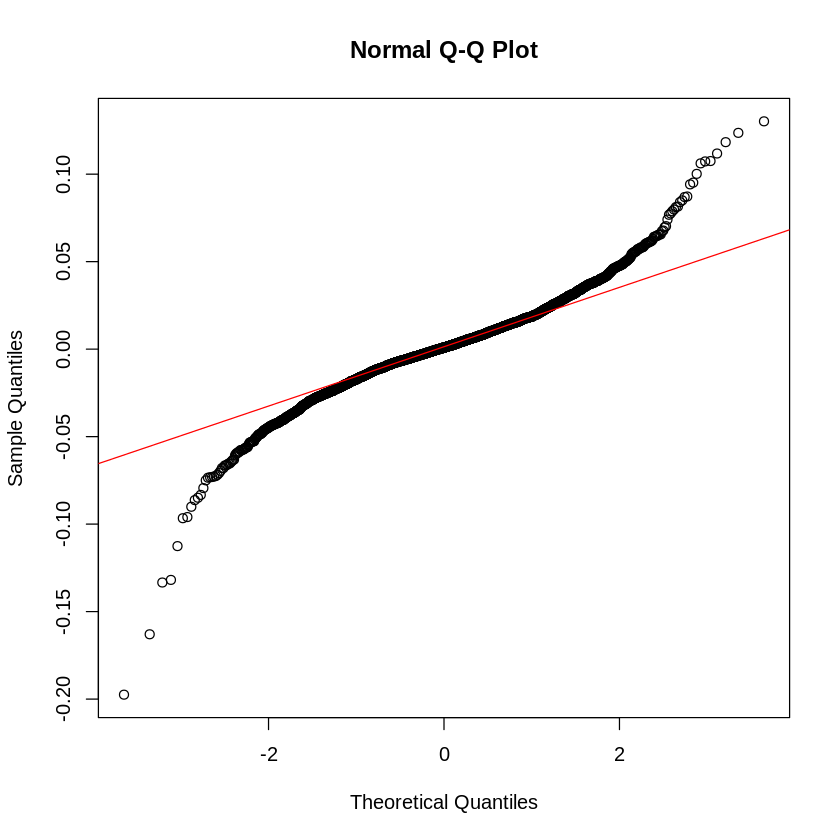

In [ ]:
# QQ PLOT
qqnorm(data_transformed)
qqline(data_transformed, col = "red")


In [ ]:

# Calculate skewness and kurtosis
skewness_value <- skewness(data_transformed)
kurtosis_value <- kurtosis(data_transformed)

# Print the values
print(paste("Skewness:", skewness_value))
print(paste("Kurtosis:", kurtosis_value))


[1] "Skewness: -0.190150869898795"
[1] "Kurtosis: 5.43351876083983"


In [ ]:
# APPLY EACF
# Apply the EACF to the original transformed data
eacf_original <- eacf(data_transformed)

# Apply the EACF to the absolute values of the transformed data
eacf_abs <- eacf(abs(data_transformed))

# Apply the EACF to the squared values of the transformed data
eacf_squared <- eacf(data_transformed^2)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 o x o x o o o o o o o  o  o  o 
1 x x o x o o o o o o o  o  o  o 
2 x x o x o x o o o o o  o  o  o 
3 x x o o o x o o o o o  o  o  o 
4 x x x x o x o o o o o  o  o  o 
5 x x x x x x o o o o o  o  o  o 
6 x x o x x x o o o o o  o  o  o 
7 x x x x x x x o o o o  o  o  o 
AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x x x  x  x  x 
1 x o o o o o o x x o o  x  o  o 
2 x x o o o o o o x o o  x  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x o o o o o o o o o  o  o  o 
5 x x x x x o o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x x x x x x x o o o o  o  o  o 
AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x x x x x x x x x x  x  x  x 
1 x o o o o x x o o x o  o  o  o 
2 x x o o o x o o o x o  o  o  o 
3 x x o o o x o o o x o  o  o  o 
4 x x x x o x o o o x o  o  x  o 
5 x x x x x o o o o x o  x  o  o 
6 x x x x x x o o o x o  o  x  o 
7 x x x x x x x o o x o  o  x  o 


In [ ]:
# Train and Test separation (Spliting)
# Given 'data_transformed' is your complete time series data
data_length <- length(data_transformed)

# Specify the number of observations to leave out for testing
test_set_size <- 30

# Calculate the length of the training data based on the total data length and test set size
training_length <- data_length - test_set_size

# Split the data into training and testing sets using the calculated training length
train_set <- data_transformed[1:training_length]
test_set <- data_transformed[(training_length + 1):data_length]

# Now, 'train_set' contains the data minus the last 30 observations for training
# and 'test_set' contains the last 30 observations of our data for testing


In [ ]:
# Volatility Modeling by GARCH

# optimal choice is garch(1,1)
# Fit a GARCH(1,1) model to your training data
garch_model <- garch(data_transformed, order = c(1, 1))

# Display the summary of the fitted model
summary(garch_model)

# Calculate and print the AIC
aic_value <- AIC(garch_model)
cat("AIC of the model:", aic_value, "\n")


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     4.522856e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -1.249e+04
     1    7 -1.249e+04  8.69e-05  1.40e-04  1.3e-04  1.1e+10  1.3e-05  7.38e+05
     2    8 -1.249e+04  5.12e-06  5.47e-06  1.2e-04  2.0e+00  1.3e-05  1.54e+01
     3   15 -1.251e+04  1.91e-03  2.60e-03  3.4e-01  2.0e+00  5.3e-02  1.54e+01
     4   18 -1.255e+04  3.08e-03  2.69e-03  6.5e-01  2.0e+00  2.1e-01  1.08e+00
     5   19 -1.260e+04  3.75e-03  7.03e-03  4.4e-01  2.0e+00  4.2e-01  1.55e+02
     6   29 -1.264e+04  3.01e-03  1.89e-02  3.8e-05  2.8e+00  5.2e-05  4.64e-02
     7   31 -1.266e+04  1.75e-03  1.07e-03  3.7e-05  2.0e+00  5.2e-05  4.20e-03
     8   32 -1.266e+04  3.85e-04  9.51e-04  3.5e-05  2.0e+00  5.2e-05  9.83e-02
     9   33 -1.267e+04  2.54e-04  3.47e-04  3.8e-05 


Call:
garch(x = data_transformed, order = c(1, 1))

Model:
GARCH(1,1)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.98972 -0.48906  0.04531  0.63983  6.17996 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 4.448e-06   6.825e-07    6.517 7.17e-11 ***
a1 4.769e-02   3.472e-03   13.735  < 2e-16 ***
b1 9.441e-01   4.227e-03  223.335  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 1968.1, df = 2, p-value < 2.2e-16


	Box-Ljung test

data:  Squared.Residuals
X-squared = 1.1213, df = 1, p-value = 0.2896


AIC of the model: -18547.17 



	Ljung-Box test

data:  Residuals
Q* = 14.518, df = 10, p-value = 0.1507

Model df: 0.   Total lags used: 10



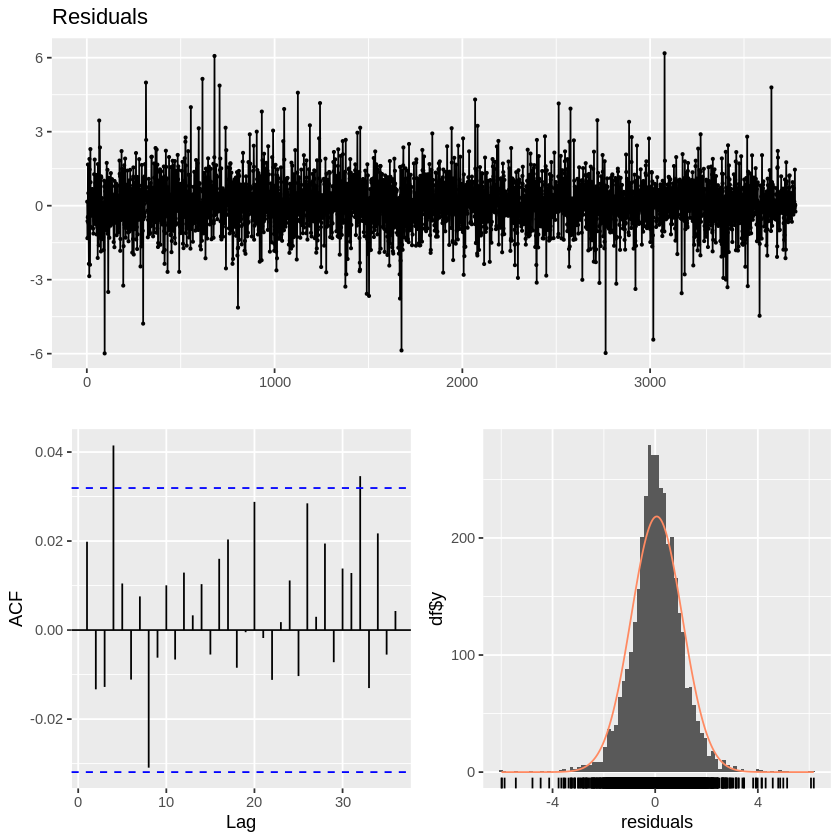

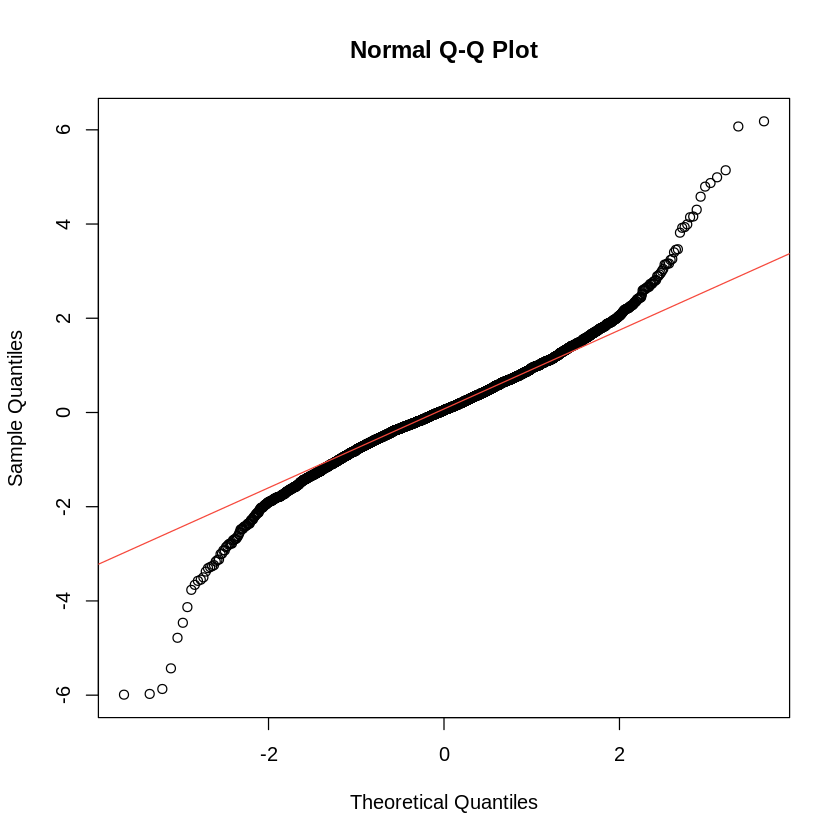

In [ ]:
# RESIDUAL CHECKING
# Residual checks
resids <- residuals(garch_model)

# Check residuals using built-in diagnostic plots
checkresiduals(garch_model)

# QQ plot of residuals
qqnorm(resids)
qqline(resids, col = 2)




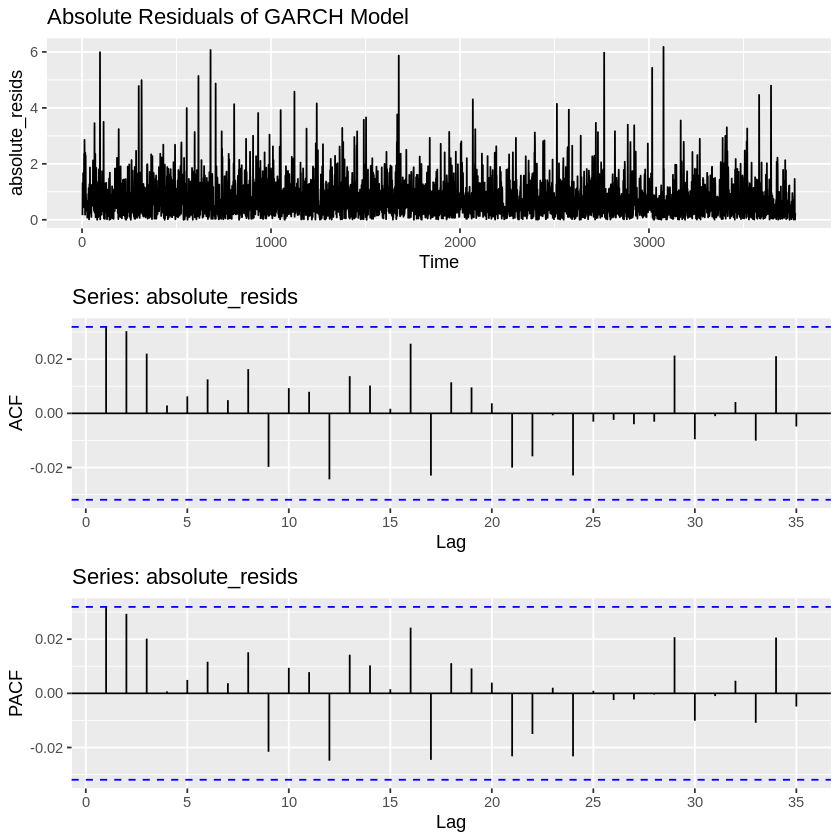

In [ ]:
# Display of absolute residuals
# autoplot(ts(abs(resids)), main="Absolute Residuals of GARCH Model")
# Assuming 'resids' are the residuals from your GARCH model
absolute_resids <- ts(abs(resids))

# Plot the absolute residuals
p1 <- autoplot(absolute_resids, main = "Absolute Residuals of GARCH Model")

# Generate ACF and PACF plots
acf_plot <- Acf(absolute_resids, main = "ACF of Absolute Residuals", plot = FALSE)
pacf_plot <- Pacf(absolute_resids, main = "PACF of Absolute Residuals", plot = FALSE)

# Convert ACF and PACF plots to ggplot objects using the autoplot function
acf_ggplot <- autoplot(acf_plot)
pacf_ggplot <- autoplot(pacf_plot)

# Combine the plots into a single display
grid.arrange(p1, acf_ggplot, pacf_ggplot, ncol = 1)



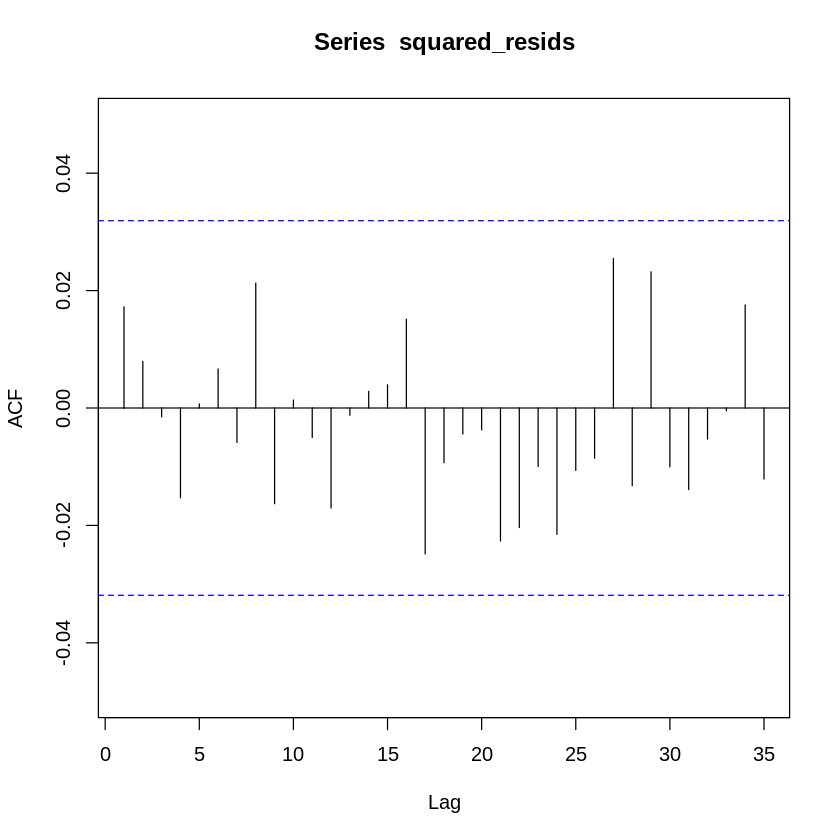

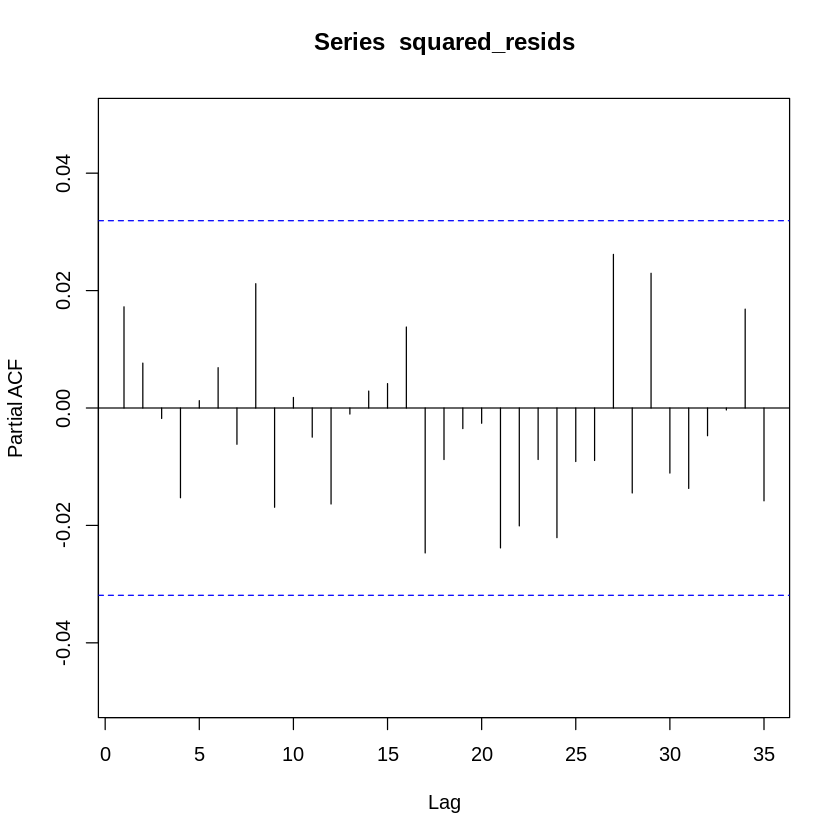

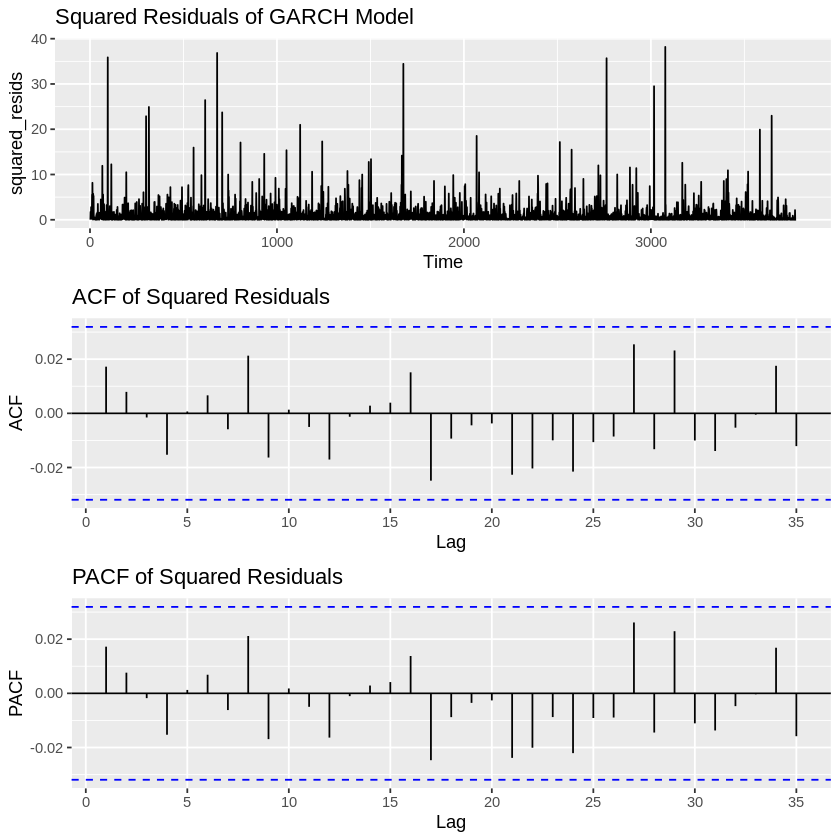

In [ ]:

# Display of squared residuals
# autoplot(ts(resids^2), main="Squared Residuals of GARCH Model")

squared_resids <- ts(resids^2)

# Time series plot of squared residuals using autoplot
p1 <- autoplot(squared_resids) + ggtitle("Squared Residuals of GARCH Model")

# # ACF and PACF plots using Acf() and Pacf(), and setting titles using ggtitle
acf_ggplot <- autoplot(Acf(squared_resids)) + ggtitle("ACF of Squared Residuals")
pacf_ggplot <- autoplot(Pacf(squared_resids)) + ggtitle("PACF of Squared Residuals")

# # Convert ggplot objects to grobs
p1_grob <- ggplotGrob(p1)
acf_grob <- ggplotGrob(acf_ggplot)
pacf_grob <- ggplotGrob(pacf_ggplot)

# # Arrange the grobs in a single column layout
grid.arrange(p1_grob, acf_grob, pacf_grob, ncol = 1)


In [ ]:
#### Advanced GARCH Modeling #########################################

# Define model specifications for error distributions
model_details <- c("sged", "sstd", "std", "ged", "snorm", "ghyp", "jsu", "nig")

# Define category of GARCH models
model_cat <- list("gjrGARCH", "sGARCH", "eGARCH")

# Initialize a list to store model fit objects or summaries
model_fits <- list()

# Iterate over each model specification and type
for (spec in model_details) {
    for (model_type in model_cat) {
        # Create a unique name for each spec and type
        model_name <- paste(model_type, spec, sep="_")

        # Define the GARCH model specification using a new variable
        garch_spec <- ugarchspec(
            variance.model = list(model = model_type, garchOrder = c(1, 1)),
            mean.model = list(armaOrder = c(0, 0), include.mean = FALSE),
            distribution.model = spec
        )
        # Fit the GARCH model to the data
        fit <- ugarchfit(spec = garch_spec, data = data_transformed)

        # Store the model fit in the list under a unique key
        model_fits[[model_name]] <- fit

        # Print model type and distribution with summary
        cat("\nFitted model:", model_type, "with distribution:", spec, "\n")
        print(summary(fit))
    }
}



Fitted model: gjrGARCH with distribution: sged 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: sGARCH with distribution: sged 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: eGARCH with distribution: sged 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: gjrGARCH with distribution: sstd 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: sGARCH with distribution: sstd 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: eGARCH with distribution: sstd 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: gjrGARCH with distribution: std 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: sGARCH with distribution: std 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: eGARCH with distribution: std 
   Length     Class      Mode 
        1 uGARCHfit        S4 

Fitted model: g

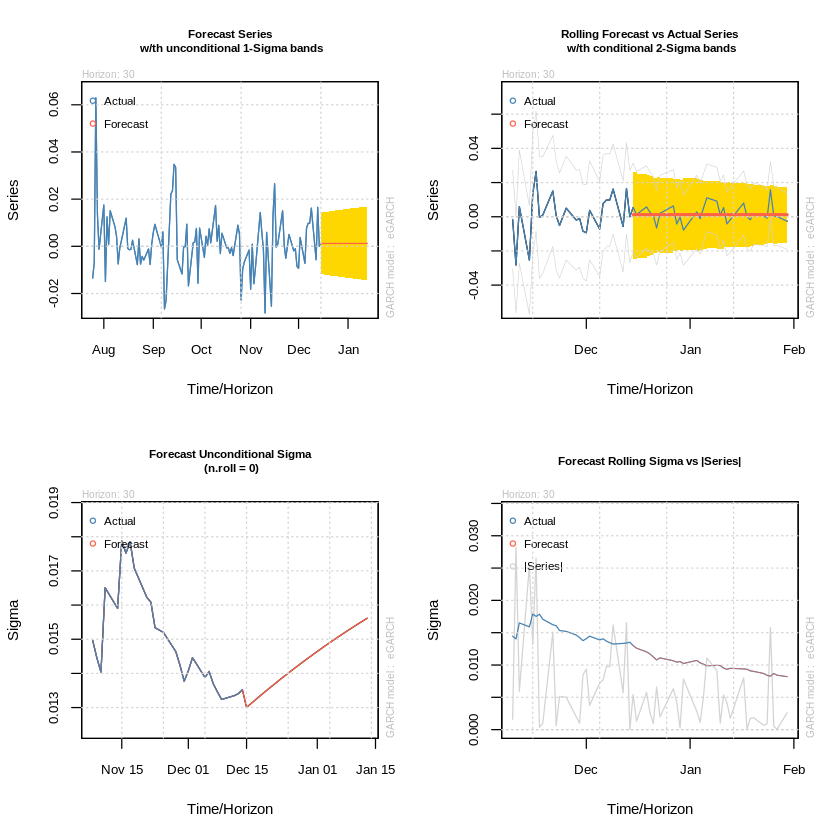

In [ ]:
# Forecasting using GARCH
# Define the GARCH model specification
forecast_spec <- ugarchspec(
    mean.model = list(armaOrder = c(0, 0)),  # No ARMA components in the mean equation
    variance.model = list(
        model = "eGARCH",  # Specify eGARCH model
        garchOrder = c(1, 1)  # GARCH(1,1) terms
    ),
    distribution.model = "std"  # Student's t-distribution
)

# Fit the model using data except for the test data
forecast_fit <- ugarchfit(spec = forecast_spec, data = data_transformed, out.sample = length(test_set))

# Forecast the next points equivalent to the length of the test data
forecast <- ugarchforecast(forecast_fit, n.ahead = length(test_set), n.roll = length(test_set))

# Plot the forecast results
plot(forecast, which = "all")


In [ ]:
# SIMULATION FOR THE FUTURE

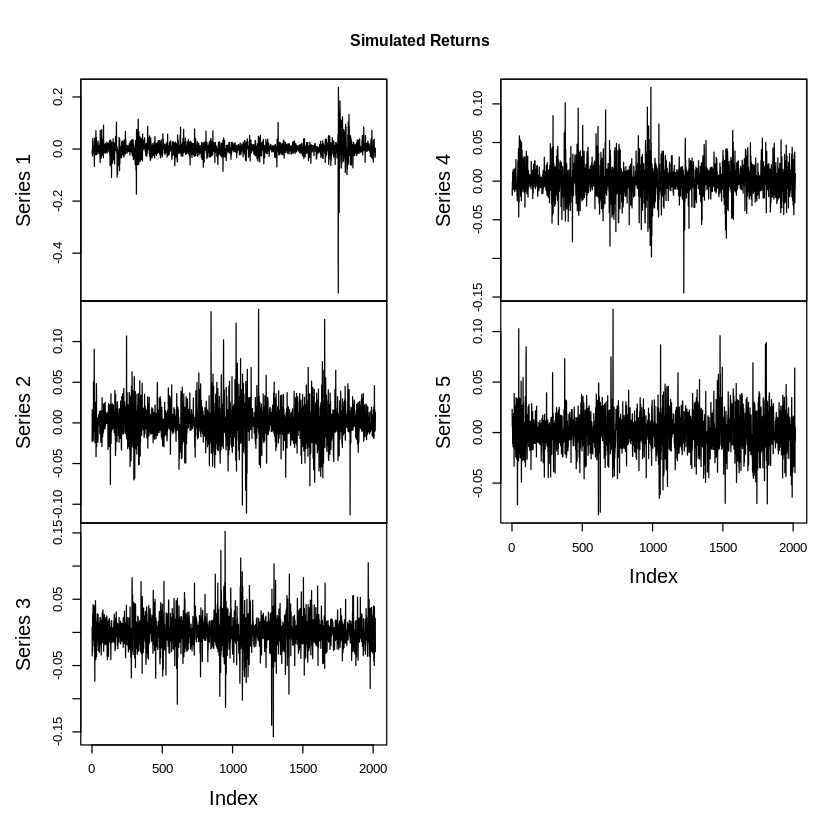

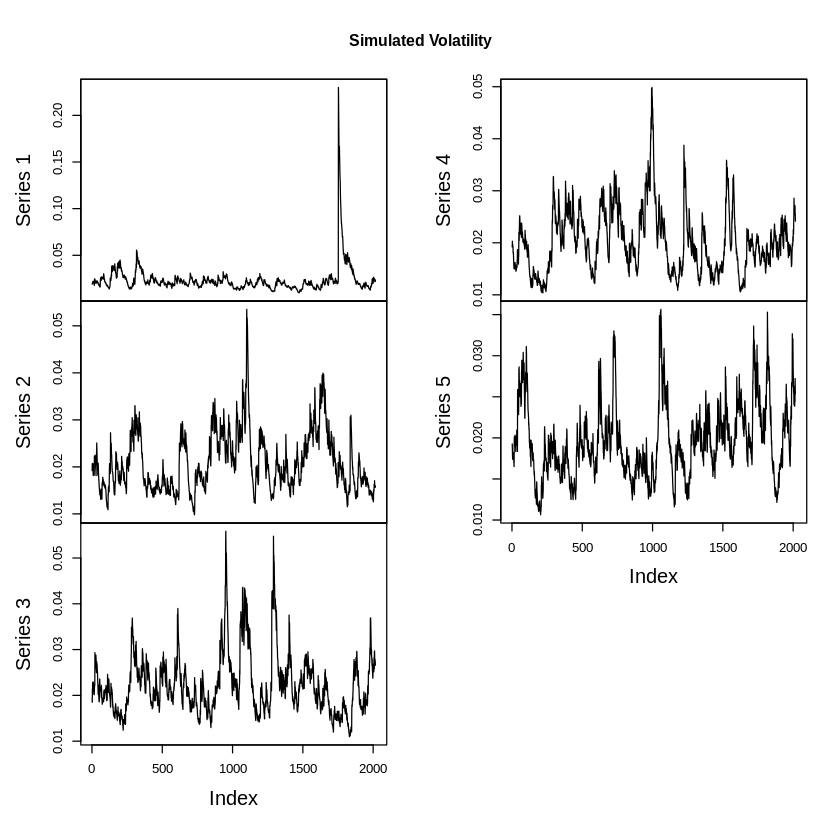

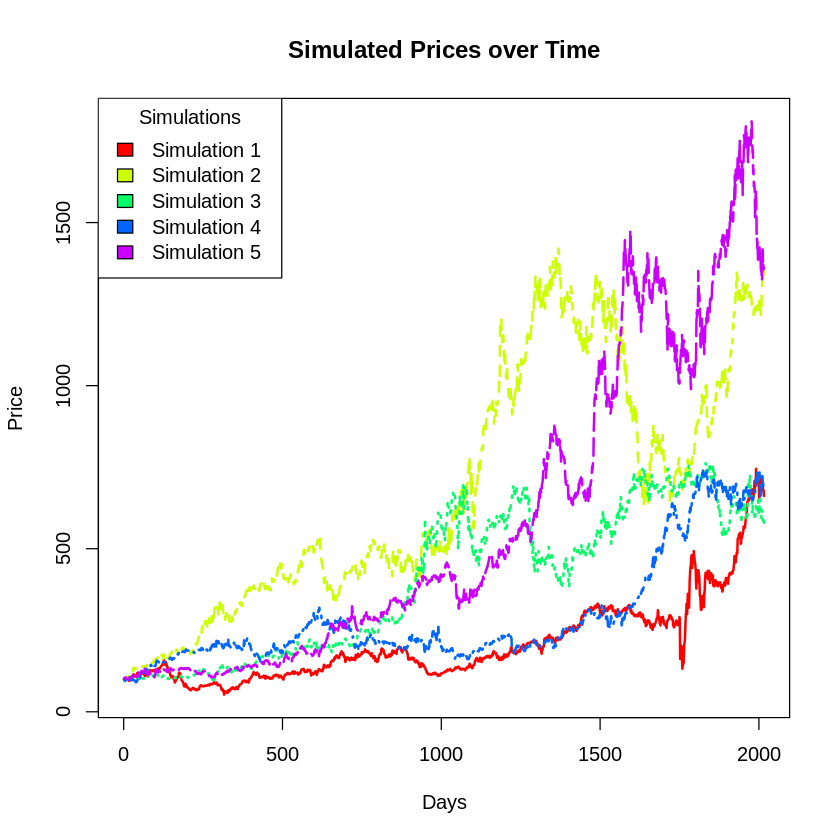

In [ ]:
# Define the GARCH model specification
simulation_spec <- ugarchspec(
    mean.model = list(armaOrder = c(0, 0)),  # No ARMA components
    variance.model = list(model = "eGARCH", garchOrder = c(1, 1)),
    distribution.model = "std"  # Student's t-distribution
)

# Fit the model to the training data
simulation_fit <- ugarchfit(spec = simulation_spec, data = train_set)
# Extract coefficients and set them as fixed parameters
fixed_params <- as.list(coef(simulation_fit))
setfixed(simulation_spec) <- fixed_params

# Simulate future paths using the fixed parameters
simulation <- ugarchpath(
    spec = simulation_spec,
    m.sim = 5,  # 5 parallel simulations
    n.sim = 8 * 252,  # Simulate for 8 years, assuming 252 trading days per year
    rseed = 123  # Seed for reproducibility
)

# Extract simulated returns and volatility
simulated_returns <- fitted(simulation)
simulated_volatility <- sigma(simulation)

# Plot simulated returns and volatility
plot.zoo(simulated_returns, main = "Simulated Returns")
plot.zoo(simulated_volatility, main = "Simulated Volatility")


# Convert returns to prices, assuming a starting price
starting_price <- 100
simulated_prices <- starting_price * exp(apply(simulated_returns, 2, cumsum))

# Plot the simulated prices using matplot
matplot(simulated_prices, type = "l", lwd = 2, col = rainbow(n = ncol(simulated_returns)),
        main = "Simulated Prices over Time", xlab = "Days", ylab = "Price")
legend("topleft", legend = paste("Simulation", 1:ncol(simulated_returns)), fill = rainbow(ncol(simulated_returns)), title = "Simulations")
